In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn shap openpyxl


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

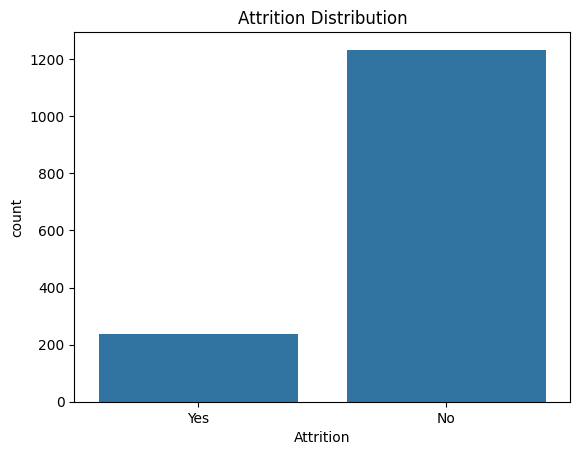

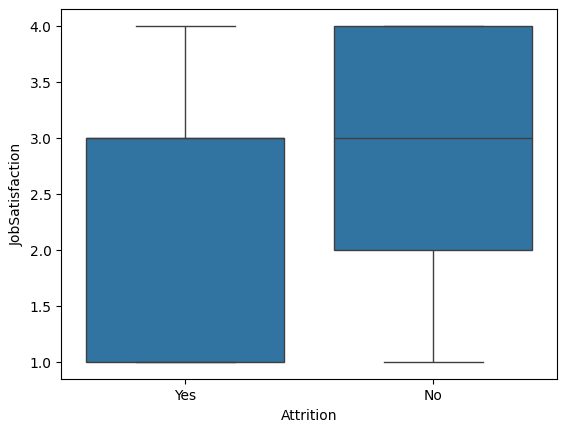

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition count
sns.countplot(x='Attrition', data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv'))
plt.title('Attrition Distribution')
plt.show()

# Boxplot for JobSatisfaction vs Attrition
sns.boxplot(x='Attrition', y='JobSatisfaction', data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv'))
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare input and output
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[253   2]
 [ 35   4]]
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



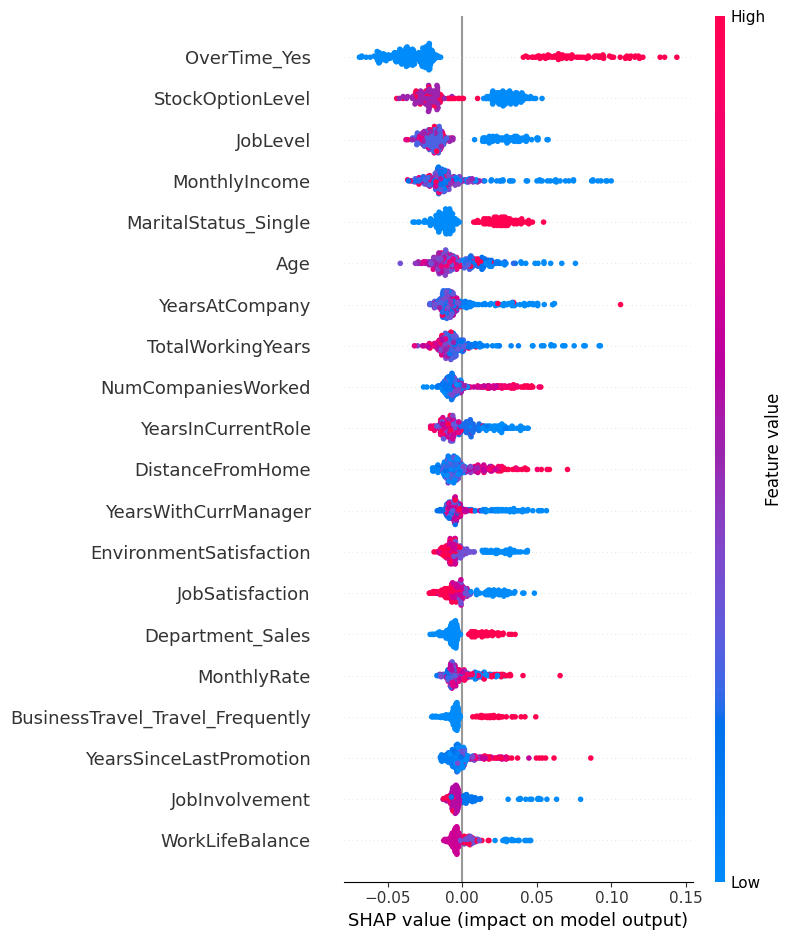

In [ ]:
import shap
import numpy as np # Import numpy

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the 'Yes' attrition class (index 1)
# The shape is (samples, features, classes). We want all samples and features for class index 1.
shap_values_class_1 = shap_values[:, :, 1]

# Now the shape of shap_values_class_1 is (294, 44), matching X_test (294, 44)
shap.summary_plot(shap_values_class_1, X_test)

In [ ]:
df_dashboard = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_dashboard.to_excel("HR_Attrition_Cleaned.xlsx", index=False)
